In [ ]:
try:
  # Use the Colab's preinstalled TensorFlow 2.x
  %tensorflow_version 2.x
except:
  pass

In [ ]:
!pip install tensorflow-io

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf

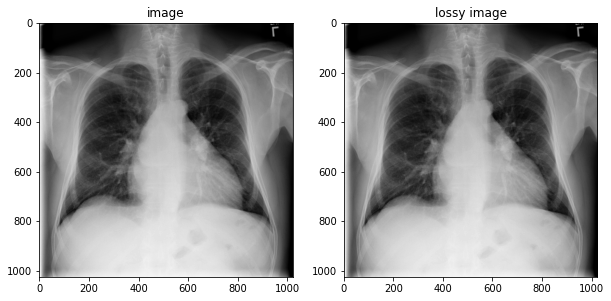

In [ ]:
import tensorflow_io as tfio

image_bytes = tf.io.read_file('dicom_00000001_000.dcm')
#image_bytes = tf.io.read_file('2-1.dcm')

image = tfio.image.decode_dicom_image(image_bytes, dtype=tf.uint16)

skipped = tfio.image.decode_dicom_image(image_bytes, on_error='skip', dtype=tf.uint8)

lossy_image = tfio.image.decode_dicom_image(image_bytes, scale='auto', on_error='lossy', dtype=tf.uint8)


fig, axes = plt.subplots(1,2, figsize=(10,10))
axes[0].imshow(np.squeeze(image.numpy()), cmap='gray')
axes[0].set_title('image')
axes[1].imshow(np.squeeze(lossy_image.numpy()), cmap='gray')
axes[1].set_title('lossy image');

In [ ]:
tag_id = tfio.image.dicom_tags.PatientsAge
tag_value = tfio.image.decode_dicom_data(image_bytes,tag_id)
print(tag_value)

tf.Tensor(b'58', shape=(), dtype=string)


In [ ]:
print(f"PatientsAge : {tag_value.numpy().decode('UTF-8')}")

PatientsAge : 58


In [ ]:
tag_id = tfio.image.dicom_tags.PatientsSex
tag_value = tfio.image.decode_dicom_data(image_bytes,tag_id)
print(f"PatientsSex : {tag_value.numpy().decode('UTF-8')}")

PatientsSex : M


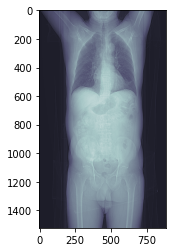

In [ ]:
pip install pydicom

import matplotlib.pyplot as plt
import pydicom
from pydicom.data import get_testdata_files
filename = '2-1.dcm'
ds = pydicom.dcmread(filename)
plt.imshow(ds.pixel_array, cmap=plt.cm.bone)